In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Gradient Descent (Advanced)

In this exercise, we will

- Code our Gradient Descent in vectorized form for a high-dimensional Loss Function
- Fine-tune your choice of # of epochs on GD

## 1. Our Dataset

We are going to study the [diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) and try to predict the **intensity of the disease** based on **10 quantitative features**, such as body-mass-index, age, etc. (regression problem)

In [14]:
X, y = datasets.load_diabetes(return_X_y = True, as_frame = True)

print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [15]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [16]:
X.shape

(442, 10)

In [17]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


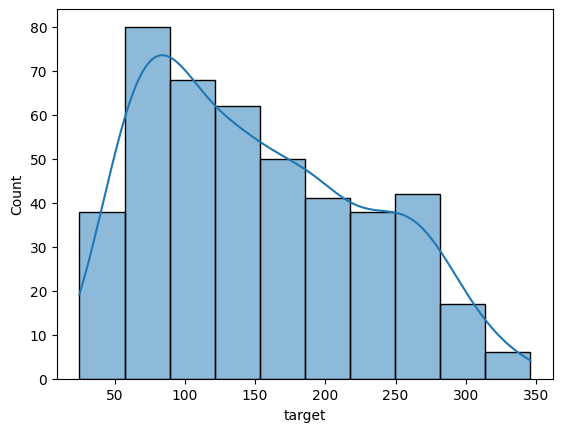

In [18]:
sns.histplot(y, kde = True);

## 2. Code a Vectorial Gradient Descent

We're modeling a linear regression $\hat{y} = X\beta$

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/vectorial-gradient.jpg">

So, first, let's add an "intercept" column of "ones" to our feature matrix X

In [19]:
# Let's add an intercept column of "ones" 
X = np.hstack((X, np.ones((X.shape[0], 1))))

In [20]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,1.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,1.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,1.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,1.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,1.0


We've created a train/test split for you with `test_size=0.3` and `random_state=1` (so that we all have repeatable results)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1)


Let's recall the definition of the gradient descent algorithm

$$\text{Gradient descent - vector formula}$$
$$\beta^{\color {red}{(k+1)}} = \beta^{\color {red}{(k)}} - \eta \ \nabla L(\beta^{\color{red}{(k)}})$$

The MSE Loss for an OLS regression is

$$L(\beta) = \frac{1}{n}\|X \beta - y\|^2 = \frac{1}{n}(X \beta - y)^T(X \beta - y)$$

and its gradient is
$${\displaystyle \nabla L(\beta)=
{\begin{bmatrix}{\frac {\partial L}{\partial \beta_{0}}}(\beta)\\\vdots \\{\frac {\partial L}{\partial \beta_{p}}}(\beta)\end{bmatrix}} = \frac{2}{n} X^T (X\beta - y) 
}$$

Let's store our main problem parameters below:

In [22]:
# n observations
n = X.shape[0] 
n_train = X_train.shape[0]
n_test = X_test.shape[0]

# p features (including the intercept)
p = X.shape[1]

# Gradient Descent hyper-params
eta = .1
n_epochs= 100

❓ Initialize a $\beta$ vector of zeros of shape **p**

In [39]:
# YOUR CODE HERE
beta = np.array([0 for _ in range(p)])
beta

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
np.dot(X_train, beta.T)

array([167.0782383 , 159.17854204, 154.34791753, 156.0044073 ,
       163.82190812, 148.63901625, 142.49685175, 161.51887683,
       144.41517244, 152.7128788 , 146.48481275, 154.83301232,
       154.7662227 , 147.62873091, 155.45840912, 159.80594668,
       154.94112117, 171.17377171, 160.42310271, 156.72807838,
       156.40788704, 151.06403978, 147.25151149, 158.11873096,
       160.69192127, 142.30592388, 137.50944488, 154.69999059,
       152.64542199, 143.35590625, 147.44027318, 156.2285134 ,
       165.47755681, 160.16579294, 164.09770664, 146.52033951,
       140.90667682, 151.24968891, 155.15684817, 146.08723964,
       164.37036852, 146.3985834 , 169.29968319, 164.75422413,
       148.39429391, 155.53149843, 151.95309767, 155.98614667,
       158.03626668, 156.81884525, 148.79630256, 158.44008949,
       153.55787767, 151.18613656, 159.78756061, 161.92916737,
       148.55211574, 150.29701178, 145.26649117, 149.92668473,
       168.37168662, 157.19266142, 157.96137048, 160.51

In [40]:
np.dot(X_train, beta)  - np.array(y_train)

array([-270., -172.,  -78.,  -94., -131., -109.,  -52., -275., -101.,
        -85., -111.,  -95., -111., -178., -151., -164.,  -58., -217.,
       -244., -161., -170., -200., -179.,  -91., -277.,  -57., -143.,
        -84.,  -85., -140.,  -88., -206., -295., -181., -192.,  -42.,
       -158., -121.,  -66., -118., -139.,  -39.,  -84., -336.,  -59.,
       -225., -246., -310., -219., -166.,  -53., -151., -124.,  -53.,
        -67., -120., -103.,  -71.,  -48., -187., -252., -288., -178.,
       -131., -220.,  -51., -150., -261., -174., -259., -257., -236.,
        -93.,  -61.,  -53., -272.,  -60.,  -44., -125.,  -49., -208.,
       -182., -144.,  -84., -248., -123., -128., -303., -128.,  -65.,
       -141., -104., -127., -104., -108., -272., -136., -197., -168.,
       -235., -182.,  -96., -275., -259., -129., -264., -297.,  -89.,
        -70., -232., -245., -152., -113., -257., -110.,  -65., -110.,
       -341.,  -83., -132., -281., -243., -252., -131., -242., -128.,
        -42., -263.,

❓ Using the vectorized formula given above, create a Gradient Descent that loops over `n_epochs` to find the best $\beta$ of an OLS using the `train` set
- make use of NumPy's matrix operations and broadcasting capabilities
- this shouldn't take more than 4 lines of code!

In [41]:
for epoch in range(n_epochs):
    gradient = 2 / n_train * np.dot(X_train.T, (np.dot(X_train, beta) - y_train))
    beta = beta - eta * gradient

In [42]:
print('Best ß: ', beta)

Best ß:  [ 13.88877812   1.6767504   45.64204342  31.67134515  13.17780485
   9.52749193 -28.21620784  30.03382058  41.48427879  27.12324669
 153.73815888]


## Predict

❓Compute predictions on your test set (`y_pred`), and the resulting `loss_test` (MSE loss for OLS).

In [46]:
# YOUR CODE HERE
y_pred = np.dot(X_test, beta)
y_pred

array([150.74106835, 140.58204582, 155.69440939, 140.07461937,
       159.89074013, 159.31314105, 164.1522936 , 152.44786812,
       153.2840896 , 150.07094077, 157.96445853, 160.07205564,
       148.92966229, 144.15856941, 160.17122473, 158.33463073,
       159.28694356, 147.41446028, 157.41810351, 157.48070772,
       160.99948146, 143.67756889, 147.65257234, 140.45764636,
       143.87845055, 157.76656091, 142.46008096, 153.10001841,
       158.39865721, 161.32085969, 158.29922879, 156.1533201 ,
       160.22568465, 142.09473009, 149.78850612, 162.59498792,
       142.1044204 , 163.47441725, 159.04296246, 160.02841624,
       151.78826806, 155.12104316, 150.35096029, 151.74406181,
       150.70119821, 160.97108403, 150.8763396 , 150.08758806,
       159.6761608 , 165.22832067, 144.57098824, 155.80793487,
       150.86742234, 150.74987937, 160.08111861, 153.1152697 ,
       154.77340213, 149.33863153, 140.04981601, 143.3861143 ,
       149.47490636, 160.21680333, 158.3206457 , 148.52

In [50]:
# YOUR CODE HERE
((y_test-y_pred)**2).sum() / y_test.shape[0]

4477.6183367564

In [51]:
y_test.shape

(133,)

## Wrap these into a function called `gradient_decent`

❓ Wrap this logic into a function called `gradient_descent`, which takes as input some (`X_train`, `y_train`, `X_test`, `y_test`, `eta`, `n_epoch`) values, and returns:
- the final value for $\beta$ fitted on the train set
- the values of the `loss_train` at each epoch as a list called `loss_train_history`
- the values of the `loss_test` at each epoch as a list called `loss_test_history`
- (optional) make the function robust to call with only a train_set

In [85]:
def gradient_descent(X_train, y_train, X_test, y_test, eta = eta, n_epochs = 100):
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    p = X_train.shape[1]

    beta = np.zeros(p)

    loss_train_history = []
    loss_test_history = [np.inf]

    for epoch in range(n_epochs):
        gradient = 2 / n_train * np.dot(X_train.T, (np.dot(X_train, beta) - y_train))
        saved_beta = beta
        beta = beta - eta * gradient
        
        y_pred_test = np.dot(X_test, beta)
        loss = ((y_test-y_pred_test)**2).sum() / y_test.shape[0]
        
        if loss_test_history[-1] < loss:
            loss_test_history.pop(0)
            return saved_beta, loss_train_history, loss_test_history
        
        loss_test_history.append(loss)
        
        y_pred_train = np.dot(X_train, beta)
        loss_train_history.append(((y_train-y_pred_train)**2).sum() / y_train.shape[0])
    
    loss_test_history.pop(0)
    return beta, loss_train_history, loss_test_history

In [86]:
np.inf > 1

True

## Early stopping criteria?

❓Plot the loss as a function of epochs, on your train dataset. 
- Try it with `n_epochs=10000` and `eta=0.1` as was initially set
- Zoom in with `plt.ylim(ymin=2800, ymax=3000)` to see the behavior of the Loss Function on the test set
- What can you conclude? Should you always "descend" the gradient down to the absolute minimum?

In [122]:
beta, loss_train_history, loss_test_history = gradient_descent(X_train, y_train, X_test, y_test, eta = 0.1, n_epochs = 10000)

In [88]:
loss_test_history

[18679.210233471847,
 13520.775012940421,
 10267.27543205838,
 8222.778811592307,
 6943.939313696506,
 6148.652380170698,
 5657.677406349046,
 5357.3430680773445,
 5175.73200284291,
 5067.481491557609,
 5004.089786569438,
 4967.7392026333855,
 4947.364473551976,
 4936.153721826954,
 4929.962824706561,
 4926.311580423919,
 4923.750013227372,
 4921.4598007425375,
 4919.004769631836,
 4916.175669443206,
 4912.894386006738,
 4909.155478850333,
 4904.991033332919,
 4900.449977000918,
 4895.586288022829,
 4890.452603113082,
 4885.097048435262,
 4879.561947421331,
 4873.883581473792,
 4868.092506068486,
 4862.214127741457,
 4856.269372529703,
 4850.275352649215,
 4844.245983903038,
 4838.19253311708,
 4832.124090101095,
 4826.04796679882,
 4819.970030271186,
 4813.89497770831,
 4807.826561864335,
 4801.767774801617,
 4795.720996999036,
 4789.688117942582,
 4783.670633393597,
 4777.669723681791,
 4771.686316621119,
 4765.721138002887,
 4759.77475207709,
 4753.847593980469,
 4747.93999569636,
 

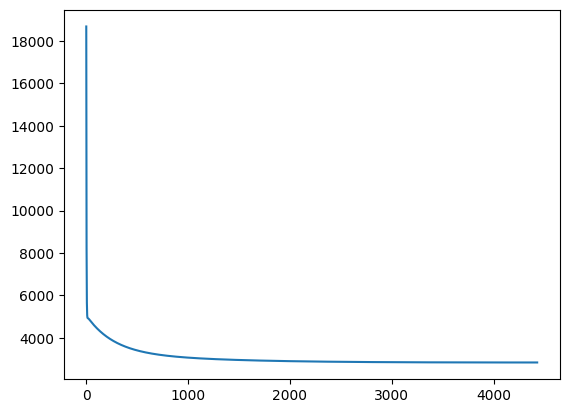

In [89]:
# YOUR CODE HERE
x = np.array([x for x in range(1, len(loss_test_history)+1)])
plt.plot(x, loss_test_history)
plt.plot();

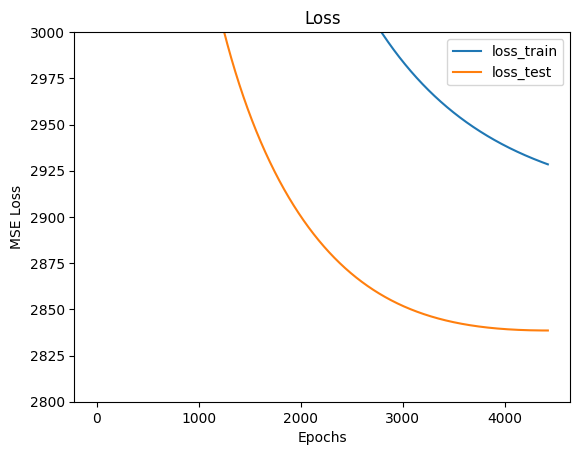

In [90]:
# Plot train and test histories
plt.plot(loss_train_history, label = 'loss_train')
plt.plot(loss_test_history, label = 'loss_test')

# Set title and labels
plt.title('Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')

# Change limits
plt.ylim(ymin = 2800, ymax = 3000)

# Generate legend
plt.legend()

In [91]:
np.argmin(np.array(loss_test_history))

4425

❓ What do you notice?

> YOUR ANSWER HERE

❓Can you think of a method to improve the performance of your model? Take time to write it in pseudo-code below before looking at the hints.

<details>
    <summary>Hints</summary>

- We could decide to stop the GD as soon as the test loss starts to increase again.
- ⚠️ Yet we can't use the "test set" created initially to decide when to stop descending gradient; this would create data leakage! Never use your test set to optimize your model's `hyperparameters`.
- Create instead a train/test split **within** your current training set and optimize your early stopping based on the loss of this new test set only. This one is usually called a **validation set**. 
</details>

In [92]:
#PSEUDO-CODE
optimal_epoch = 4425

❓ Update your `gradient_descent` method based on the Hints above!

In [ ]:
# YOUR CODE HERE

❓ Create your train/val set and try to improve your MSE with early stopping, using `random_state = 1`

It should stop earlier than before!

In [ ]:
# YOUR CODE HERE

In [94]:
def gradient_descent_early_stopping(X_train, y_train, X_test, y_test, eta = eta, n_epochs = 100):
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    p = X_train.shape[1]

    beta = np.zeros(p)

    loss_train_history = []
    loss_test_history = [np.inf]

    for epoch in range(n_epochs):
        gradient = 2 / n_train * np.dot(X_train.T, (np.dot(X_train, beta) - y_train))
        saved_beta = beta
        beta = beta - eta * gradient
        
        y_pred_test = np.dot(X_test, beta)
        loss = ((y_test-y_pred_test)**2).sum() / y_test.shape[0]
        
        if loss_test_history[-1] < loss:
            loss_test_history.pop(0)
            return saved_beta, loss_train_history, loss_test_history
        
        loss_test_history.append(loss)
        
        y_pred_train = np.dot(X_train, beta)
        loss_train_history.append(((y_train-y_pred_train)**2).sum() / y_train.shape[0])
    
    loss_test_history.pop(0)
    return beta, loss_train_history, loss_test_history

In [95]:
beta_es, loss_train_history, loss_val_history = gradient_descent_early_stopping(X_train_train, y_train_train, X_val, y_val, n_epochs = 10000, eta = .1)

# Plot train and test histories
plt.plot(loss_train_history, label = 'loss_train')
plt.plot(loss_val_history, label = 'loss_test')

# Set title and labels
plt.title('Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')

# Change limits
plt.ylim(ymin = 2500, ymax = 4000)

# Generate legend
plt.legend()

NameError: name 'X_train_train' is not defined

## Mini-Batch Descent

❓ Modify your gradient_descent function into a `minibatch_gradient_descent` one.

In [ ]:
def gradient_descent_early_stopping(X_train, y_train, X_test, y_test, eta = eta, n_epochs = 100):
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    p = X_train.shape[1]

    beta = np.zeros(p)

    loss_train_history = []
    loss_test_history = [np.inf]

    for epoch in range(n_epochs):
        gradient = 2 / n_train * np.dot(X_train.T, (np.dot(X_train, beta) - y_train))
        saved_beta = beta
        beta = beta - eta * gradient
        
        y_pred_test = np.dot(X_test, beta)
        loss = ((y_test-y_pred_test)**2).sum() / y_test.shape[0]
        
        if loss_test_history[-1] < loss:
            loss_test_history.pop(0)
            return saved_beta, loss_train_history, loss_test_history
        
        loss_test_history.append(loss)
        
        y_pred_train = np.dot(X_train, beta)
        loss_train_history.append(((y_train-y_pred_train)**2).sum() / y_train.shape[0])
    
    loss_test_history.pop(0)
    return beta, loss_train_history, loss_test_history

In [127]:
from sklearn.utils import resample
from sklearn.utils import shuffle

def minibatch_gradient_descent(X_train, y_train, X_test, y_test, batch_size = 16, eta = eta, n_epochs = n_epochs):
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]

    p = X_train.shape[1]

    beta = np.zeros(p)
    print(beta)

    loss_train_history = []
    loss_test_history = []

    if isinstance(y_train, pd.Series):
        y_train = y_train.to_numpy()

    for epoch in range(n_epochs):
        
        X_train, y_train = shuffle(X_train, y_train, random_state=0)
        
        # Loop over your dataset in mini-batches, and for each mini-batch update your beta
        max_n_batch = int(X_train.shape[0]/batch_size)
        
        for x in range(max_n_batch):
            start_point = x*batch_size
            X_mini_batch = X_train[start_point: start_point + batch_size]
            y_mini_batch = y_train[start_point: start_point + batch_size]
            
            gradient = 2 / n_train * np.dot(X_mini_batch.T, (np.dot(X_mini_batch, beta) - y_mini_batch))
            saved_beta = beta
            beta = beta - eta * gradient

        y_pred_test = np.dot(X_test, beta)
        loss = ((y_test-y_pred_test)**2).sum() / y_test.shape[0]
        loss_test_history.append(loss)

        y_pred_train = np.dot(X_train, beta)
        loss_train_history.append(((y_train-y_pred_train)**2).sum() / y_train.shape[0])

    return beta, loss_train_history, loss_test_history

❓ Plot the evolution of your train and val losses per epoch. What if you chose minibatch = 1?

In [128]:
# YOUR CODE HERE
beta, loss_train_history_mb, loss_test_history_mb = minibatch_gradient_descent(X_train, y_train, X_test, y_test, batch_size = 16, eta = 0.01, n_epochs = 10_000)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


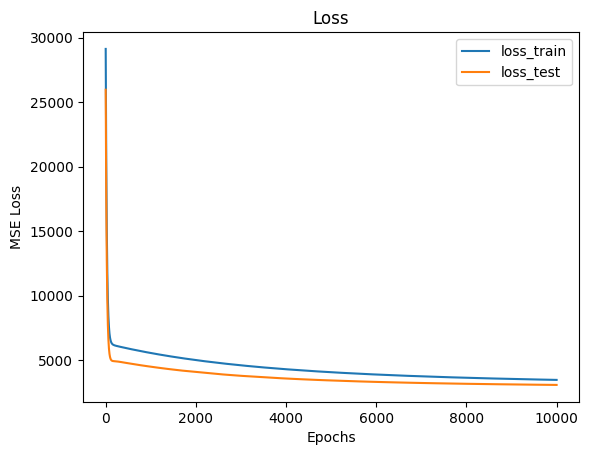

In [129]:
# Plot train and test histories
plt.plot(loss_train_history_mb, label = 'loss_train')
plt.plot(loss_test_history_mb, label = 'loss_test')

# Set title and labels
plt.title('Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')

# Generate legend
plt.legend()

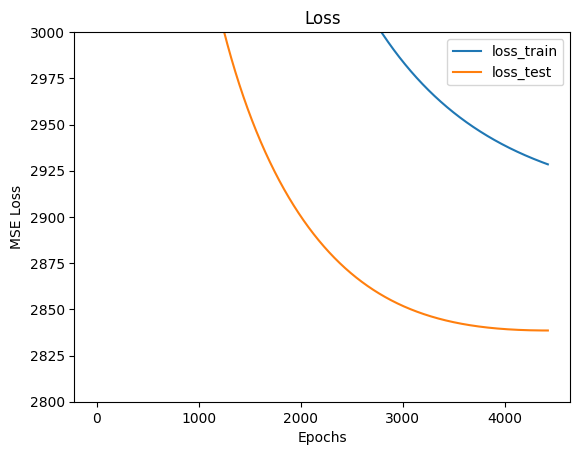

In [130]:
# Plot train and test histories
plt.plot(loss_train_history, label = 'loss_train')
plt.plot(loss_test_history, label = 'loss_test')

# Set title and labels
plt.title('Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')

# Change limits
plt.ylim(ymin = 2800, ymax = 3000)

# Generate legend
plt.legend()

❓ How would you adjust the early stopping criteria to these fluctuations?

<details>
    <summary>Hint</summary>

To avoid early stopping too early due to the stochastic nature of the mini-batch descent, we could add a "patience" term to stop only after the val loss is increased for a sustained period of "patience" # of epochs.
</details>

## Conclusion: a new way to check for overfitting

<img src="https://wagon-public-datasets.s3-eu-west-1.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/underfitting_overfitting_at_a_glance.webp" width=800>

📚 Read more about:

- [Underfitting and overfitting](https://towardsdatascience.com/overfitting-vs-underfitting-a-complete-example-d05dd7e19765)
- [Gradient Descent in Python](https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f)